In [ ]:
pip install pandas


In [2]:
import pandas as pd

In [24]:
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [ ]:
pip install wordcloud

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [8]:
# Ruta a la carpeta donde están los archivos
df_genres_id = pd.read_csv('C:/Users/Usuario/Desktop/Desarrollo de mi proyecto python/Proyecto/Data Limpia Movies/df_genres_id.csv')
df_central = pd.read_csv('C:/Users/Usuario/Desktop/Desarrollo de mi proyecto python/Proyecto/Data Limpia Movies/df_central.csv')

# Mostrar las primeras filas de los DataFrames para verificar

print(df_genres_id.head()
print(df_central.head())


     budget     id original_language  popularity release_date      revenue  \
0  30000000    862                en   21.946943   1995-10-30  373554033.0   
1  65000000   8844                en   17.015539   1995-12-15  262797249.0   
2         0  15602                en   11.712900   1995-12-22          0.0   
3  16000000  31357                en    3.859495   1995-12-22   81452156.0   
4         0  11862                en    8.387519   1995-02-10   76578911.0   

   runtime    status                        title  vote_average  vote_count  \
0     81.0  Released                    Toy Story           7.7      5415.0   
1    104.0  Released                      Jumanji           6.9      2413.0   
2    101.0  Released             Grumpier Old Men           6.5        92.0   
3    127.0  Released            Waiting to Exhale           6.1        34.0   
4    106.0  Released  Father of the Bride Part II           5.7       173.0   

   release_year  return  
0          1995   12.45  
1   

In [14]:



def obtener_peliculas_completas():
    # Realiza la fusión de los DataFrames
    df_completa = df_genres_id.merge(df_central, on='id')
    
    # Limita el DataFrame a las primeras 1000 filas
    df_completa = df_completa.head(1000)
    
    # Agrupa los géneros por 'id' y los concatena en una sola cadena
    df_completa['genres'] = df_completa.groupby('id')['genre'].transform(lambda x: ' '.join(x))
    
    # Elimina duplicados basados en la columna 'id'
    df_completa = df_completa.drop_duplicates(subset=['id'])
    
    # Selecciona solo las columnas necesarias
    df_completa = df_completa[['id', 'title', 'genres']]
    
    return df_completa


In [11]:
df_genres_id['id'] = df_genres_id['id'].astype(str)
df_central['id'] = df_central['id'].astype(str)


In [15]:
df_completa = obtener_peliculas_completas()
print(df_completa.head())

       id                        title                    genres
0     862                    Toy Story   Animation Comedy Family
3    8844                      Jumanji  Adventure Fantasy Family
6   15602             Grumpier Old Men            Romance Comedy
8   31357            Waiting to Exhale      Comedy Drama Romance
11  11862  Father of the Bride Part II                    Comedy


In [21]:
df_completa

,id,title,genres
0,862,Toy Story,Animation Comedy Family
3,8844,Jumanji,Adventure Fantasy Family
6,15602,Grumpier Old Men,Romance Comedy
8,31357,Waiting to Exhale,Comedy Drama Romance
11,11862,Father of the Bride Part II,Comedy
...,...,...,...
985,46094,The Air Up There,Comedy Family
987,9409,Another Stakeout,Action Comedy
989,11853,Bad Girls,Action Adventure Comedy Drama Western
994,16771,Barcelona,Comedy Drama Romance


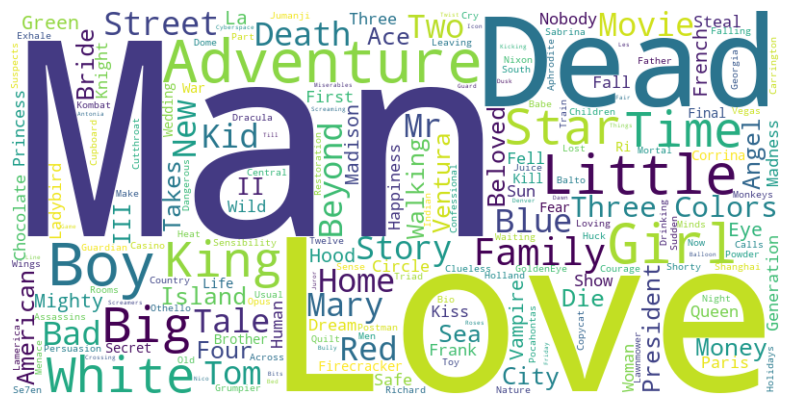

In [22]:
# Concatenar todos los títulos en una sola cadena
text = ' '.join(df_completa['title'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

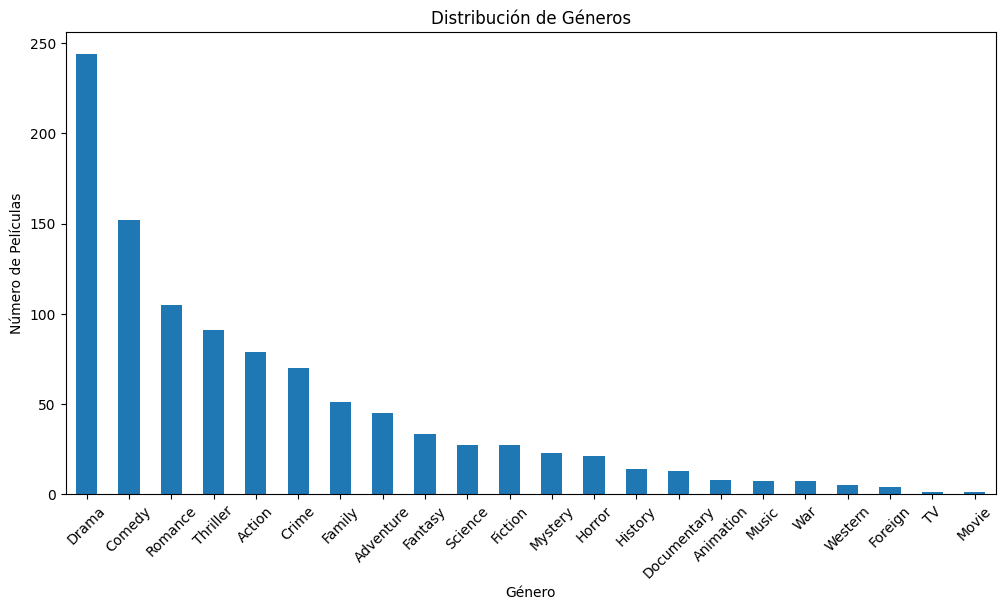

In [23]:
# Contar la frecuencia de cada género
all_genres = ' '.join(df_completa['genres']).split()
genre_counts = pd.Series(all_genres).value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.show()

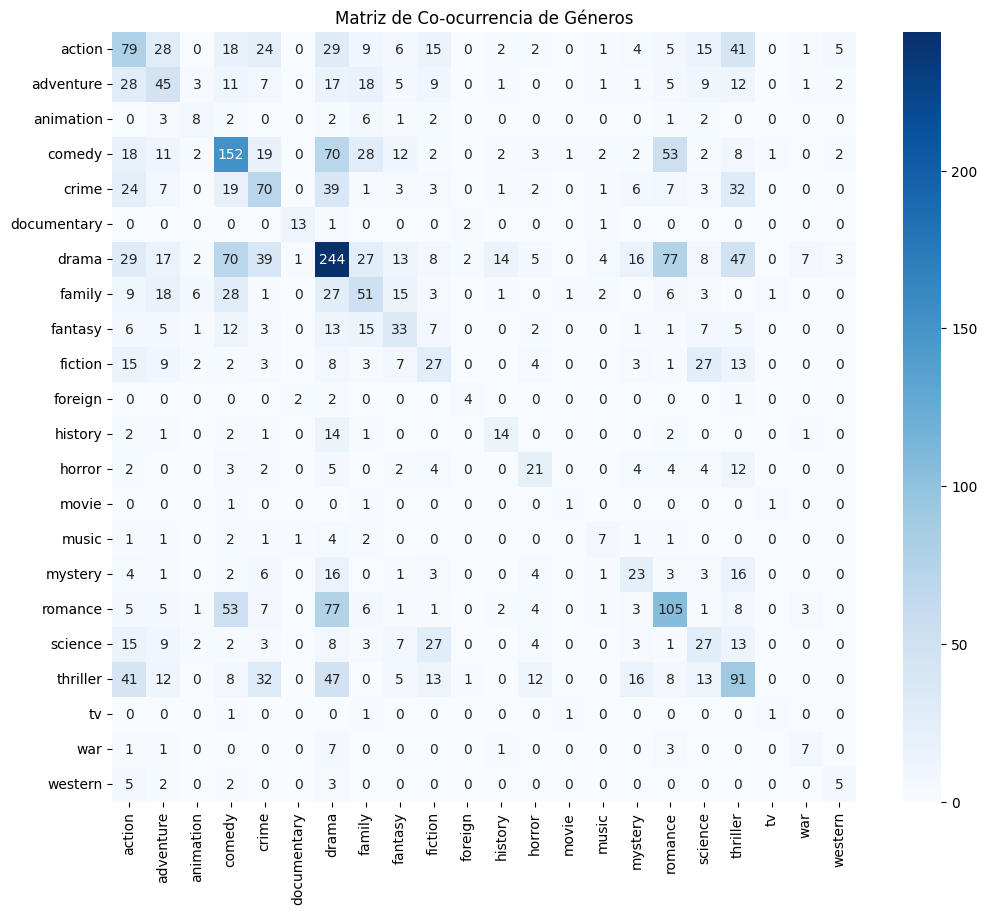

In [25]:
# Vectorizar los géneros
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_completa['genres'])

# Crear un DataFrame de la matriz de co-ocurrencia
co_occur_matrix = (X.T * X).A
co_occur_df = pd.DataFrame(co_occur_matrix, index=vectorizer.get_feature_names_out(), columns=vectorizer.get_feature_names_out())

# Mostrar el heatmap de co-ocurrencia de géneros
plt.figure(figsize=(12, 10))
sns.heatmap(co_occur_df, cmap='Blues', annot=True, fmt='d')
plt.title('Matriz de Co-ocurrencia de Géneros')
plt.show()